# Final Report Draft

## Introduction
The Olympic Charter specifies that: “The goal of Olympism is to place sport at the service of the harmonious development of humankind, with a view to promoting a peaceful society concerned with the preservation of human dignity.” An ideal Olympics game is aimed to promote development and equality between countries, and the top-performing countries stands for those best health, equality, and all aspects of well-being. However, it is easily noticeable that in real Olympics games, most of the medals go to a few countries in the world. Many of the countries which we believe to have the best welfare, healthcare, and social equality (most of the Western European countries) are not the ones with the best rankings. To find out the indicators that most commonly features among the top -performing countries, this project will examine the athletic events over the 200 years and see if any meaningful patterns could be found. 

**The Research Question**

What factors regarding a country's well-being (economics, health, education, gender equality etc.) typically indicates higher olympics game performance?

Note: Higher olympics game performance does not necessarily means winning medals, it already means a lot just to participate in the Qualifying Tournament. But for this project, I will focus on athlete number and medal number to quantify the olympics game performance.
_____

## Data Description
##### What are the observations (rows) and the attributes (columns)?

The observations are countries in different olympic years.

The attributes includes both **olympics game performance-related features** and **indicators of a country's well-being**:
* year: the year of the Olympics game
* country_code: the World Bank country code
* country_name: the country name
* athlete_number: the number of atheletes participating in the olympics game, 
* male: the number of male atheletes
* female: the number of female atheletes
* gold: the number of gold medals
* silver: the number of silver medals
* bronze: the number of bronze medals
* medal_number: the total number of medals
* gdp: the  Gross Domestic Product (GDP)
* gdp_percap: the GDP per capita
* gdp_growth: the GDP growth
* life_expectancy: life expectancy at birth, total (years)
* health_expenditure: current health expenditure (% of GDP)
* school_enrollment: secondary school enrollment (% gross)
* age_dependency: age dependency ratio of the old (% of working-age population)
* social_insurance: ddequacy of social insurance programs (% of total welfare of beneficiary households)
* female_literacy: literacy rate of adult female ages 15 and above

##### Why was this dataset created?
The dataset is created to record countries's performances in the olympics games (awards and participation) and to provide an interface for comparing these performances with the countries well-being in the respective year by matching to their indicators of different dimensions (from economics to healthcare). Such an interface can be used for the specific task of studying the relationship between a country performance in the olympics game and their well-being and determining the factors that typically indicates higher olympics performances.

##### Who funded the creation of the dataset?
The original olympics athlete events dataset is funded by the International Olympics Committee. The indicators (GDP, life expectancy, etc.) are collected by the World Bank from statistical systems of member countries, funded by the national government revenues.

##### What processes might have influenced what data was observed and recorded and what was not?
* This research focus on the summer olympics results so the winter olympics results are dropped from the original dataset. This however does not reflect that some countries might perform better in Winter olympics.
* Athlete events before the year that official indicators started to be recorded (GDP, life expectancy etc.) are dropped. Since the World Bank's data record start from 1960, olympics data before the time is not included.
* Olympics data from historically divided countries are merged together (ex. the results of East Germany and West Germany are added up as Germany) to ensure the consistency of data record over time to see the changes in a region. But this does not necessarily reflect the discrepency between different economic bodies.
* Countries or regions without independent GDP record in the World Bank database (ex. Palestine and the Soviet Union) are dropped from the dataset, so some olympic participant countries are not included in the final dataset as they do not lead in insight for evaluating the relationship between olympics performance and well-being.
* The individual athletes and the refugee groups are not included because they do not officially affiliate to any countries. But this overlook the training and other domestic resources they get from their countries and tend to undermeasure the performance of the countries.

##### What preprocessing was done, and how did the data come to be in the form that you are using?
Winter olympics events, events prior to 1960, individual teams, and teams not officially recognized are dropped from the raw `athlete_events` dataset. A new dataframe `olympics_data` is created to store the initial years, countries, and country codes. Several functions are applied to count the total number of athletes, female and male athletes, the number of each type of medals, and the total medal number of a country in a specific year. The `country_name` column is filled up with official country name from the Olympics by matching olympics country code. The official names are then matched to the World Bank country names to replace the olympics country code with the World Bank country code. Olympics countries without data record on the World Bank is dropped from the dataset. Finally the nine indicators from the World Bank database is loaded in and matched to the olympics data by the unified country code.

##### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
Individual athletes are involved in the collection of the raw olympics athlete events dataset. The olympics athlete are aware that their results are collected for ranking the countries during the game and for media publication or other distribution afterwards.

##### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
The raw olympics athlete events dataset can be found at https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results. The raw indicators dataset can be found at the World Bank database at https://data.worldbank.org/indicator?tab=all. The downloaded raw datasets can be found at https://drive.google.com/drive/folders/1I0LOJg2untvZoXeYmaFS3qlBth0Ej8xT?usp=sharing.
___

## Preregistration Statement
Does wealthier countries from each income group perform significantly better in the olympics game than less wealthy countires within the group?

Is there a significant correlation between drops or increases in economic conditions of a country and changes in its olympic performance?
___

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.linear_model import LinearRegression

In [2]:
olympics = pd.read_csv('olympics_data.csv')
olympics.head()

,year,country_code,country_name,athlete_number,male,female,gold,silver,bronze,medal_number,gdp,gdp_percap,gdp_growth,life_expectancy,health_expenditure,age_dependency,female_literacy
0,1960,AFG,Afghanistan,16,16,0,0,0,0,0,5.377778e+08,59.773194,NaN,32.446000,NaN,5.082210,NaN
1,1960,ARG,Argentina,116,115,1,0,3,1,4,NaN,NaN,NaN,65.055000,NaN,8.722883,NaN
2,1960,AUS,Australia,280,224,56,11,24,11,46,1.857767e+10,1807.785710,NaN,70.817073,NaN,14.067773,NaN
3,1960,AUT,Austria,198,144,54,1,2,0,3,6.592694e+09,935.460427,NaN,68.585610,NaN,18.519609,NaN
4,1960,BEL,Belgium,150,130,20,0,2,2,4,1.165872e+10,1273.691659,NaN,69.701951,NaN,18.376222,NaN


We first have a general overview of the two features, `athlete_number` and `medal_number`, used to measure olympics performance:

In [3]:
olympics.groupby('year')['medal_number'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1960,81.0,9.148148,21.391068,0.0,0.0,1.0,7.00,125.0
1964,91.0,9.395604,24.731392,0.0,0.0,0.0,5.50,169.0
1968,109.0,7.926606,22.087246,0.0,0.0,0.0,4.00,166.0
1972,117.0,8.427350,30.018189,0.0,0.0,0.0,2.00,253.0
1976,89.0,11.595506,35.434870,0.0,0.0,0.0,8.00,273.0
1980,78.0,12.012821,34.217598,0.0,0.0,0.0,7.50,264.0
1984,139.0,10.611511,37.235543,0.0,0.0,0.0,1.50,352.0
1988,154.0,8.324675,31.434314,0.0,0.0,0.0,1.00,296.0
1992,165.0,10.175758,31.893678,0.0,0.0,0.0,3.00,224.0


Notably and surprisingly, at least half of the countries participating in the olympics game don't win any medal at all time from 1960 (except for the year 1960 when the median is 1). In every year, there is a huge gap between the upper quartile and the maximum number of medals a country wins, suggesting that the distribution of medal numbers is **extremely right-skewed**. The mean of the `medal_number` tends to stabalize between 9 and 11, while the standard deviation tends to increase over time, corresponding with the widen of the gap between the upper quatile and the maximum value.
The overall increase in the `count()` of the `medal_number` suggests that the number of countires participating in the olympics game increases over time.

To visualize how the `medal_number` distribution changes over time, a boxplot is drawn for each year on the same axis. The changes in the total medal number is also plotted, with the y-axis on the right. To get rid of the heavy "0"s and to get an overall idea of the shape of the distribution, only `medal_number` great than 0 are plotted.

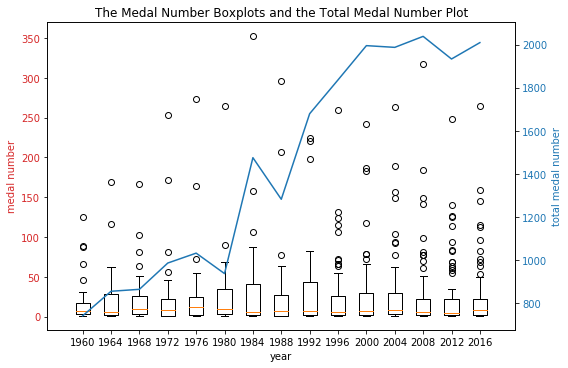

In [4]:
plt.rcParams['figure.figsize'] = [8, 5]

medalNum = [olympics.loc[(olympics['year'] == year) & (olympics['medal_number'] > 0)]['medal_number'] 
         for year in range(1960,2020,4)]
totalMedalNum = [olympics.loc[(olympics['year'] == year) & (olympics['medal_number'] > 0)]['medal_number'].sum() 
         for year in range(1960,2020,4)]

fig, ax1 = plt.subplots()

ax1.set_xlabel('year')
ax1.set_ylabel('medal number', color='tab:red')
ax1.boxplot(medalNum)
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()

ax2.set_ylabel('total medal number', color='tab:blue')
ax2.plot([year for year in range(1,16)], totalMedalNum, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xticks(np.arange(1,16), np.arange(1960,2020,4))

fig.tight_layout()
plt.title('The Medal Number Boxplots and the Total Medal Number Plot')
plt.show()

The median of the medal numbers are about the same in each year while the number of outliers in the boxplots largely increases over time. It means that the number of countries which far outcompete the rest significantly grows, the gap between the countries' performances widens over time, and the distribution of medals gets increasingly uneven.

The total number of medals significantly increases from 1980 to 1984, due to the successful commercialize of the olympics game and the addition of several new events for female athletes. From 1988, the total number of medals continuously grows and stablizes at about 2000 in 2008.

Next, we look at the statistics of the `athlete_number`:

In [5]:
olympics.groupby('year')['athlete_number'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1960,81.0,94.740741,113.893237,1.0,14.0,47.0,140.00,428.0
1964,91.0,78.494505,110.111395,1.0,11.0,32.0,92.00,492.0
1968,109.0,73.614679,120.781169,1.0,6.0,25.0,89.00,778.0
1972,117.0,82.444444,143.318276,1.0,7.0,25.0,79.00,1041.0
1976,89.0,90.191011,141.211067,1.0,11.0,26.0,104.00,859.0
1980,78.0,82.179487,113.271510,2.0,15.0,38.0,82.50,495.0
1984,139.0,67.640288,120.071175,1.0,9.0,23.0,55.50,693.0
1988,154.0,73.110390,137.844070,2.0,10.0,19.0,54.00,918.0
1992,165.0,77.200000,137.382642,1.0,8.0,21.0,55.00,734.0


From 1960 to 2016, each of the quatiles of the `athlete_number` tend to decreases while the maximum significantly increases overall. This suggests that the distribution of the `athlete_number` becomes increasingly right-skewed over time and the gap between the differences in the number of athletes widens over time.

To visualize how the `athlete_number` distribution changes over time, a boxplot is drawn for each year on the same axis. The changes in the total athlete number is also plotted, with the y-axis on the right.

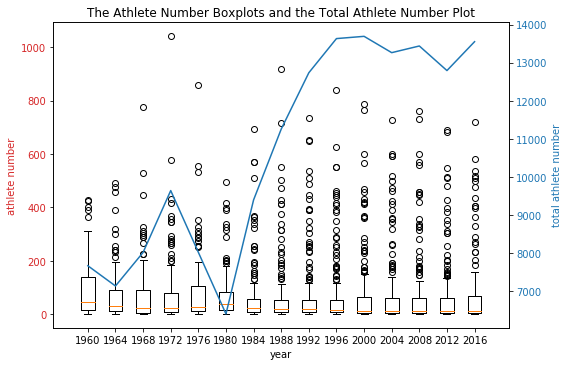

In [6]:
plt.rcParams['figure.figsize'] = [8, 5]

data1 = [olympics.loc[(olympics['year'] == year)]['athlete_number'] for year in range(1960,2020,4)]
data2 = [olympics.loc[(olympics['year'] == year)]['athlete_number'].sum() for year in range(1960,2020,4)]

fig, ax1 = plt.subplots()

ax1.set_xlabel('year')
ax1.set_ylabel('athlete number', color='tab:red')
ax1.boxplot(data1)
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()

ax2.set_ylabel('total athlete number', color='tab:blue')
ax2.plot([year for year in range(1,16)], data2, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.xticks(np.arange(1,16), np.arange(1960,2020,4))

fig.tight_layout()
plt.title('The Athlete Number Boxplots and the Total Athlete Number Plot')
plt.show()

The interqutile range of the `athlete_number` tends to shrink over time, with the median value decreasing significantly. The maximum number of athletes from a country tends to stabilize between 11000 and 12000 from year 2000. After the total number of athlete rocks the bottom at approximately 6000 in 1980, it continuously grows fast until 2000 and stablize between the range of 13000 and 14000. 

We then plot a correlation matirx to look at the correlation between each features.

In [7]:
olympics2016 = olympics2016 = olympics[olympics['year'] == 2016]

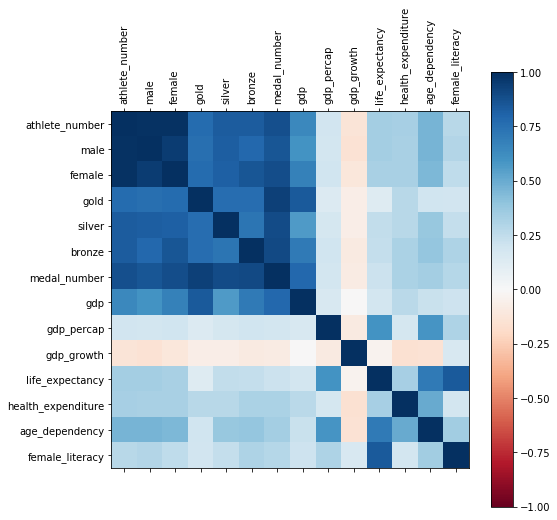

In [8]:
corr = olympics2016[olympics2016.columns[1:]].corr()

plt.rcParams['figure.figsize'] = [8, 8]
corrfig = plt.figure()
corrax = corrfig.add_subplot(111)
corrfig.colorbar(corrax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

corrax.set_xticks(range(len(corr.columns)))
corrax.set_xticklabels(corr.columns)
for tick in corrax.get_xticklabels():
        tick.set_rotation(90)

corrax.set_yticks(range(len(corr.columns)))
corrax.set_yticklabels(corr.columns)

plt.show()

Apart from the `gdp_growth`, all of the other indicators show positive correlation with the olympics data. This suggests that countries doing well in economics, health care, and gender equality generally performs better in the olympics games. At a closer look, the GDP has a much stronger positive correlation with `athlete_number` and `medal_number`, especially the gold medals than the other indicators. `age_dependency` also has a notable positive correalation with the `athlete_number`. Surprisingly, `female_literacy` (the female literacy rate), which is used to measure gender equality, does not has a strong correaltion with the number of female athletes.

From the above exploratory analysis, it is obvious that GDP is the only indicator with obvious correlation with olympics performance. Therefore, in the following analysis, I am going to focus on how GDP influences olympics performances for countries in different income groups and whether changes in olympics performances correlates with changes in GDP.

### Analysis for Question I

The function `getIncomeGroup` equally assigns the countries into three income groups each year according to their annual GDP. Number 1 to 3 respectively stands for low, middle and high. The income group data is stored into a new column called `income_group`.

In [9]:
lows = {}
highs = {}

for year in olympics['year'].unique():
    lows[year] = olympics[olympics['year'] == year]['gdp'].quantile(1/3)
    highs[year] = olympics[olympics['year'] == year]['gdp'].quantile(2/3)
    
def getIncomeGroup(row):
    year = row['year']
    gdp = row['gdp']
    
    if gdp < lows[year]:
        return 1
    elif lows[year] <= gdp < highs[year]:
        return 2
    elif highs[year] <= gdp:
        return 3

olympics['income_group'] = olympics.apply(getIncomeGroup, axis=1)

Because the first analysis focuses on the difference of olympics performances within each income group, we apply function `getSubgroup` to equally divide countires within each group into to subgroups, one with relatively higher income and one with relatively lower income.

In [10]:
low_mid_points = {}
middle_mid_points = {}
high_mid_points = {}

for year in olympics['year'].unique():
    low_mid_points[year] = olympics[olympics['year'] == year]['gdp'].quantile(1/6)
    middle_mid_points[year] = olympics[olympics['year'] == year]['gdp'].quantile(1/2)
    high_mid_points[year] = olympics[olympics['year'] == year]['gdp'].quantile(5/6)
    
def getSubgroup(row):
    year = row['year']
    gdp = row['gdp']
    group = row['income_group']
    
    if group == 1:
        return 1 if (gdp >= low_mid_points[year]) else 0
    elif group == 2:
        return 1 if (gdp >= middle_mid_points[year]) else 0
    elif group == 3:
        return 1 if (gdp >= high_mid_points[year]) else 0
    return 0
        
olympics['income_subgroup'] = olympics.apply(getSubgroup, axis=1)

By plotting the change in total athlete number above, it is recognized that the total number varies a lot between years. To account for such variation, the function `getAthleteFrac` is used to obtain the fraction of athlete from a country each year. The data are stored in a new column called `athlete_fraction`.

In [11]:
athlete_sums = {}

for year in olympics['year'].unique():
    athlete_sums[year] = olympics[olympics['year'] == year]['athlete_number'].sum()
    
def getAthleteFrac(row):
    year = row['year']
    athlete = row['athlete_number']
    
    return athlete/athlete_sums[year]*100

olympics['athlete_fraction'] = olympics.apply(getAthleteFrac, axis=1)

Similar to `getAthleteFrac`, `getMedalFrac` is used to obtain the fraction of medals a country wins each year. The data are stored in a new column called `medal_fraction`.

In [12]:
medal_sums = {}

for year in olympics['year'].unique():
    medal_sums[year] = olympics[olympics['year'] == year]['medal_number'].sum()
    
def getMedalFrac(row):
    year = row['year']
    medal = row['medal_number']
    
    return medal/medal_sums[year]*100

olympics['medal_fraction'] = olympics.apply(getMedalFrac, axis=1)

In [13]:
olympics.head()

,year,country_code,country_name,athlete_number,male,female,gold,silver,bronze,medal_number,...,gdp_percap,gdp_growth,life_expectancy,health_expenditure,age_dependency,female_literacy,income_group,income_subgroup,athlete_fraction,medal_fraction
0,1960,AFG,Afghanistan,16,16,0,0,0,0,0,...,59.773194,NaN,32.446000,NaN,5.082210,NaN,1.0,0,0.208496,0.000000
1,1960,ARG,Argentina,116,115,1,0,3,1,4,...,NaN,NaN,65.055000,NaN,8.722883,NaN,NaN,0,1.511598,0.539811
2,1960,AUS,Australia,280,224,56,11,24,11,46,...,1807.785710,NaN,70.817073,NaN,14.067773,NaN,3.0,1,3.648684,6.207827
3,1960,AUT,Austria,198,144,54,1,2,0,3,...,935.460427,NaN,68.585610,NaN,18.519609,NaN,2.0,1,2.580141,0.404858
4,1960,BEL,Belgium,150,130,20,0,2,2,4,...,1273.691659,NaN,69.701951,NaN,18.376222,NaN,3.0,0,1.954652,0.539811


#### Athlete Number

We train a linear regression model for each income group to predict the athlete fraction from the GDP. We look at the most recent olympic game in 2016.

In [14]:
olympics2016 = olympics[olympics['year'] == 2016]

low_income_group2016 = olympics2016[olympics2016['income_group'] == 1]
middle_income_group2016 = olympics2016[olympics2016['income_group'] == 2]
high_income_group2016 = olympics2016[olympics2016['income_group'] == 3]

In [15]:
model1 = LinearRegression()
model1.fit(np.log(low_income_group2016[['gdp']]), low_income_group2016['athlete_fraction'])

model2 = LinearRegression()
model2.fit(np.log(middle_income_group2016[['gdp']]), middle_income_group2016['athlete_fraction'])

model3 = LinearRegression()
model3.fit(np.log(high_income_group2016[['gdp']]), high_income_group2016['athlete_fraction'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

I plot the the log of GDP to athlete fraction scatterplots together with the linear regression models to show the relationship between the two features.

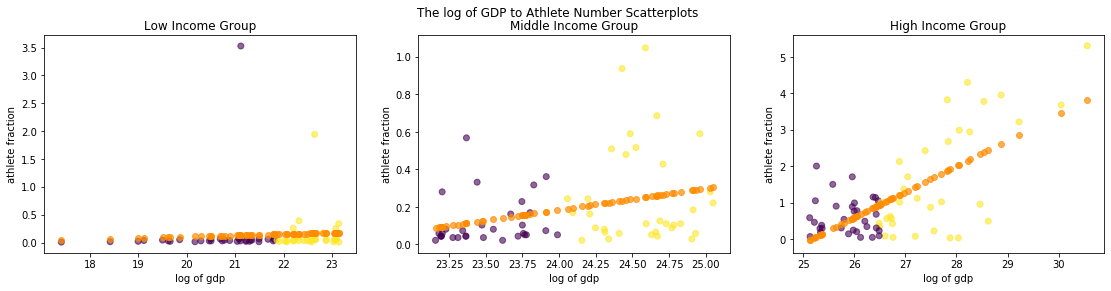

In [16]:
plt.rcParams['figure.figsize'] = [19, 4]
fig, axs = plt.subplots(1, 3)
fig.suptitle('The log of GDP to Athlete Number Scatterplots')
axs[0].scatter(np.log(low_income_group2016['gdp']), low_income_group2016['athlete_fraction'], alpha=0.6, c=low_income_group2016['income_subgroup'])
axs[0].scatter(np.log(low_income_group2016['gdp']), model1.predict(np.log(low_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[0].set_xlabel('log of gdp')
axs[0].set_ylabel('athlete fraction')
axs[0].set_title('Low Income Group')

axs[1].scatter(np.log(middle_income_group2016['gdp']), middle_income_group2016['athlete_fraction'], alpha=0.6, c=middle_income_group2016['income_subgroup'])
axs[1].scatter(np.log(middle_income_group2016['gdp']), model2.predict(np.log(middle_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[1].set_xlabel('log of gdp')
axs[1].set_ylabel('athlete fraction')
axs[1].set_title('Middle Income Group')

axs[2].scatter(np.log(high_income_group2016['gdp']), high_income_group2016['athlete_fraction'], alpha=0.6, c=high_income_group2016['income_subgroup'])
axs[2].scatter(np.log(high_income_group2016['gdp']), model3.predict(np.log(high_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[2].set_xlabel('log of gdp')
axs[2].set_ylabel('athlete fraction')
axs[2].set_title('High Income Group')
# c=high_income_group2016['athlete_fraction']

plt.show()

From the scatterplots above, we can see that there are positive correlations between athlete fraction and GDP for all three income groups. However, the linear pattern isn't so clear among the Low and Middle income groups. There isn't obvious difference in athlete fraction between wealthier and less wealthy countires within the Low income group; while the athlete fraction increases a lot as countries get wealthier within the Middle and High income groups.

In [17]:
print('Correlation between GDP and athlete fraction for Low income countires: {0:.3f}'.format(low_income_group2016[['gdp', 'athlete_fraction']].corr().loc['gdp','athlete_fraction']))
print('Correlation between GDP and athlete fraction for Middle income countires: {0:.3f}'.format(middle_income_group2016[['gdp', 'athlete_fraction']].corr().loc['gdp','athlete_fraction']))
print('Correlation between GDP and athlete fraction for High income countires: {0:.3f}'.format(high_income_group2016[['gdp', 'athlete_fraction']].corr().loc['gdp','athlete_fraction']))

Correlation between GDP and athlete fraction for Low income countires: 0.016
Correlation between GDP and athlete fraction for Middle income countires: 0.273
Correlation between GDP and athlete fraction for High income countires: 0.644


A correlation of 0.644 supports the observation that the correlation between athlete fraction and GDP is the strongest within the High income countries. The linear regression model is not a good fit for the correlation between the two variables for the Middle and Low income groups because of the much weaker correlation, respectively of 0.273 and 0.016.

<br>

#### Winning Medals

Next, I train a linear regression model for each income group to predict the medal fraction from the GDP.

In [18]:
model1 = LinearRegression()
model1.fit(np.log(low_income_group2016[['gdp']]), low_income_group2016['medal_fraction'])

model2 = LinearRegression()
model2.fit(np.log(middle_income_group2016[['gdp']]), middle_income_group2016['medal_fraction'])

model3 = LinearRegression()
model3.fit(np.log(high_income_group2016[['gdp']]), high_income_group2016['medal_fraction'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

I plot the the log of GDP to medal fraction scatterplots together with the linear regression models to show the relationship between the two features.

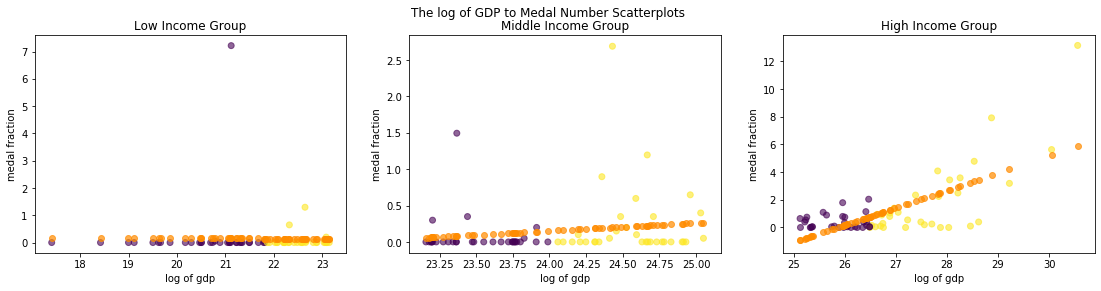

In [19]:
plt.rcParams['figure.figsize'] = [19, 4]
fig, axs = plt.subplots(1, 3)
fig.suptitle('The log of GDP to Medal Number Scatterplots')
axs[0].scatter(np.log(low_income_group2016['gdp']), low_income_group2016['medal_fraction'], alpha=0.6, c=low_income_group2016['income_subgroup'])
axs[0].scatter(np.log(low_income_group2016['gdp']), model1.predict(np.log(low_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[0].set_xlabel('log of gdp')
axs[0].set_ylabel('medal fraction')
axs[0].set_title('Low Income Group')

axs[1].scatter(np.log(middle_income_group2016['gdp']), middle_income_group2016['medal_fraction'], alpha=0.6, c=middle_income_group2016['income_subgroup'])
axs[1].scatter(np.log(middle_income_group2016['gdp']), model2.predict(np.log(middle_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[1].set_xlabel('log of gdp')
axs[1].set_ylabel('medal fraction')
axs[1].set_title('Middle Income Group')

axs[2].scatter(np.log(high_income_group2016['gdp']), high_income_group2016['medal_fraction'], alpha=0.6, c=high_income_group2016['income_subgroup'])
axs[2].scatter(np.log(high_income_group2016['gdp']), model3.predict(np.log(high_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[2].set_xlabel('log of gdp')
axs[2].set_ylabel('medal fraction')
axs[2].set_title('High Income Group')

plt.show()

From the scatterplots above, we can see that there are positive correlations between medal fraction and GDP for Middle and High income groups. There is a slightly negative correlation between the two variables within the Low income group. Similar with the athlete fraction, the linear pattern is the most evident in the High income group and weaker among the other two. It can also be seen that most of the medals are concnetrated in the most wealthies countries within the high income group. Most of the other countries win little medals ranging from 0 to 2%. There isn't obvious difference in medal fraction between wealthier and less wealthy countires within the Low income group; while the medal fraction increases a lot as countries get wealthier within the Middle and High income groups.

In [20]:
print('Correlation between GDP and medal fraction for Low income countires: {0:.3f}'.format(low_income_group2016[['gdp', 'medal_fraction']].corr().loc['gdp','medal_fraction']))
print('Correlation between GDP and medal fraction for Low income countires: {0:.3f}'.format(middle_income_group2016[['gdp', 'medal_fraction']].corr().loc['gdp','medal_fraction']))
print('Correlation between GDP and medal fraction for Low income countires: {0:.3f}'.format(high_income_group2016[['gdp', 'medal_fraction']].corr().loc['gdp','medal_fraction']))

Correlation between GDP and medal fraction for Low income countires: -0.058
Correlation between GDP and medal fraction for Low income countires: 0.140
Correlation between GDP and medal fraction for Low income countires: 0.844


A correlation of 0.844 supports the observation that there is a very high positive correlation between medal fraction and GDP within the High income countries. The linear regression model is not a good fit for the correlation between the two variables for the Middle and Low income groups because of the much weaker correlation, respectively of -0.058 and 0.140.

<br>

#### Winning the Gold Medal

Meanwhile, I noticed from the correlation matrix above that the correlation between GDP and gold medals is even stronger than that of total medals. In the data analysis below, I am also interested in finding out the differences in winning gold medals between each income groups. 

Similar to `getAthleteFrac` and `getMedalFrac`, `getGoldFrac` is used to obtain the fraction of gold medals a country wins each year. The data are stored in a new column called `gold_fraction`.

In [21]:
gold_sums = {}

for year in olympics['year'].unique():
    gold_sums[year] = olympics[olympics['year'] == year]['gold'].sum()
    
def getGoldFrac(row):
    year = row['year']
    gold = row['gold']
    
    return gold/gold_sums[year]*100

olympics['gold_fraction'] = olympics.apply(getGoldFrac, axis=1)

In [22]:
low_income_group2016 = olympics[(olympics['year'] == 2016) & (olympics['income_group'] == 1)]
middle_income_group2016 = olympics[(olympics['year'] == 2016) & (olympics['income_group'] == 2)]
high_income_group2016 = olympics[(olympics['year'] == 2016) & (olympics['income_group'] == 3)]

Like the previous analysis, I train a linear regression model for each income group to predict the gold medal fraction from the GDP.

In [23]:
model1 = LinearRegression()
model1.fit(np.log(low_income_group2016[['gdp']]), low_income_group2016['gold_fraction'])

model2 = LinearRegression()
model2.fit(np.log(middle_income_group2016[['gdp']]), middle_income_group2016['gold_fraction'])

model3 = LinearRegression()
model3.fit(np.log(high_income_group2016[['gdp']]), high_income_group2016['gold_fraction'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

I plot the log of GDP to gold medal fraction scatterplots together with the linear regression models to show the relationship between the two features.


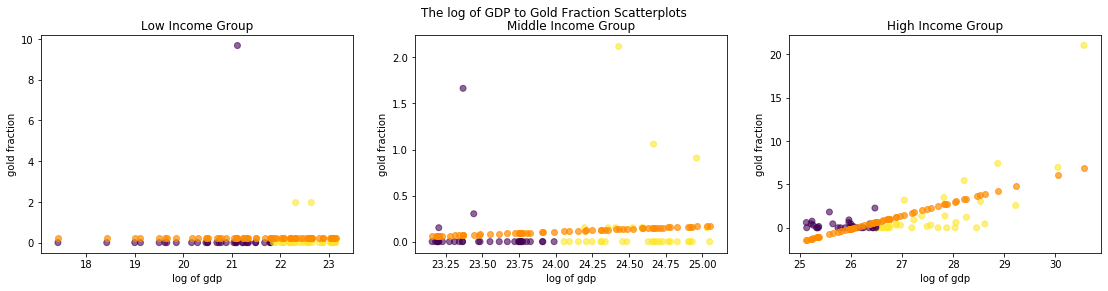

In [24]:
plt.rcParams['figure.figsize'] = [19, 4]
fig, axs = plt.subplots(1, 3)
fig.suptitle('The log of GDP to Gold Fraction Scatterplots')
axs[0].scatter(np.log(low_income_group2016['gdp']), low_income_group2016['gold_fraction'], alpha=0.6, c=low_income_group2016['income_subgroup'])
axs[0].scatter(np.log(low_income_group2016['gdp']), model1.predict(np.log(low_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[0].set_xlabel('log of gdp')
axs[0].set_ylabel('gold fraction')
axs[0].set_title('Low Income Group')

axs[1].scatter(np.log(middle_income_group2016['gdp']), middle_income_group2016['gold_fraction'], alpha=0.6, c=middle_income_group2016['income_subgroup'])
axs[1].scatter(np.log(middle_income_group2016['gdp']), model2.predict(np.log(middle_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[1].set_xlabel('log of gdp')
axs[1].set_ylabel('gold fraction')
axs[1].set_title('Middle Income Group')

axs[2].scatter(np.log(high_income_group2016['gdp']), high_income_group2016['gold_fraction'], alpha=0.6, c=high_income_group2016['income_subgroup'])
axs[2].scatter(np.log(high_income_group2016['gdp']), model3.predict(np.log(high_income_group2016[['gdp']])), c='darkorange', alpha=0.7)
axs[2].set_xlabel('log of gdp')
axs[2].set_ylabel('gold fraction')
axs[2].set_title('High Income Group')
# c=high_income_group2016['medal_fraction']

plt.show()

From the scatterplots above, we can see that there are positive correlations between gold medal fraction and GDP for Middle and High income groups. There is a slightly negative correlation between the two variables within the Low income group. It can also be seen that most of the gold medals are concnetrated in the most wealthies countries within the high income group. Most of the other countries win little gold medals ranging from 0 to 2%. There isn't obvious difference in gold medal fraction between wealthier and less wealthy countires within the Low and Middle income groups; while the gold medal fraction increases a lot as countries get wealthier within the High income group.

In [25]:
print('Correlation between GDP and gold fraction for Low income countires: {0:.3f}'.format(low_income_group2016[['gdp', 'gold_fraction']].corr().loc['gdp','gold_fraction']))
print('Correlation between GDP and gold fraction for Low income countires: {0:.3f}'.format(middle_income_group2016[['gdp', 'gold_fraction']].corr().loc['gdp','gold_fraction']))
print('Correlation between GDP and gold fraction for Low income countires: {0:.3f}'.format(high_income_group2016[['gdp', 'gold_fraction']].corr().loc['gdp','gold_fraction']))

Correlation between GDP and gold fraction for Low income countires: -0.056
Correlation between GDP and gold fraction for Low income countires: 0.098
Correlation between GDP and gold fraction for Low income countires: 0.907


As expected, there is a very strong correlation (of 0.907) between the fraction of gold medal and GDP within the High income group. The linear regression model is not a good fit for the correlation between the two variables for the Middle and Low income groups each with a correlation of -0.056 and 0.098.

<br>

### Analysis for Question II

To analyze the second question, we first want to get the growth in athlete and medal fraction to measure the improvement in olympics performances. The two variables are stored in two new columns called `athlete_growth` and `medal_growth`.

In [26]:
for year in olympics['year'].unique()[1:]:
    for country in olympics[olympics['year'] == year]['country_name'].unique():
        current_athlete = olympics[(olympics['year'] == year) & (olympics['country_name'] == country)]['athlete_fraction'].values
        last_athlete = olympics[(olympics['year'] == year - 4) & (olympics['country_name'] == country)]['athlete_fraction'].values
        if len(current_athlete) > 0 and len(last_athlete) > 0 and last_athlete[0] != 0:
            olympics.loc[(olympics['year'] == year) & (olympics['country_name'] == country), 'athlete_growth'] = (current_athlete[0] - last_athlete[0]) / last_athlete[0] * 100

In [27]:
for year in olympics['year'].unique()[1:]:
    for country in olympics[olympics['year'] == year]['country_name'].unique():
        current_medal = olympics[(olympics['year'] == year) & (olympics['country_name'] == country)]['medal_fraction'].values
        last_medal = olympics[(olympics['year'] == year - 4) & (olympics['country_name'] == country)]['medal_fraction'].values
        if len(current_medal) > 0 and len(last_medal) > 0 and last_medal[0] != 0:
            olympics.loc[(olympics['year'] == year) & (olympics['country_name'] == country), 'medal_growth'] = (current_medal[0] - last_medal[0]) / last_medal[0] * 100

In [28]:
normal_growth = olympics[(olympics['gdp_growth'] >= -20) & (olympics['gdp_growth'] <= 20)]

Below, I plot the GDP growth to athlete fraction growth and GDP growth to medal fraction growth scatterplots:

Text(0.5, 1.0, 'GDP Growth to Medal Number Growth Scatterplot')

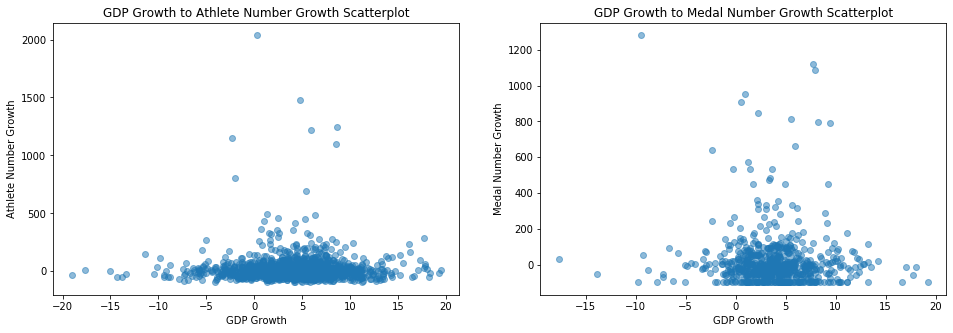

In [29]:
plt.rcParams['figure.figsize'] = [16, 5]
fig, axs = plt.subplots(1, 2)

axs[0].scatter(normal_growth['gdp_growth'], normal_growth['athlete_growth'], alpha=0.5)
axs[0].set_xlabel('GDP Growth')
axs[0].set_ylabel('Athlete Number Growth')
axs[0].set_title('GDP Growth to Athlete Number Growth Scatterplot')

axs[1].scatter(normal_growth['gdp_growth'], normal_growth['medal_growth'], alpha=0.5)
axs[1].set_xlabel('GDP Growth')
axs[1].set_ylabel('Medal Number Growth')
axs[1].set_title('GDP Growth to Medal Number Growth Scatterplot')

As seen above, it is obvious that there is no clear correlation between increase or drop in GDP and improvements in olympics performances in terms of athlete or medal fraction. Countries with the fastest GDP growth tend to have no or negative growth in athletes or medals while countires with the highest increase in athletes or medals concentrate at the range of 0 to 10% annual growth in GDP. 

In [30]:
print('Correlation between GDP growth and athlete fraction growth: {0:.3f}'.format(normal_growth[['gdp_growth', 'athlete_growth']].corr().loc['gdp_growth', 'athlete_growth']))
print('Correlation between GDP growth and medal fraction growth: {0:.3f}'.format(normal_growth[['gdp_growth', 'medal_growth']].corr().loc['gdp_growth', 'medal_growth']))

Correlation between GDP growth and athlete fraction growth: 0.011
Correlation between GDP growth and medal fraction growth: -0.047


Consitent with the observation above, the small correlations, 0.011 and -0.047 indicates little correlation between each pair of variables.

<br>

#### Ideal GDP Growth

Economists agree that the ideal annual GDP growth rate of a country is 2 to 3%, as it indicates stable economic growth and unemployment rate. Therefore, I wonder whether countries within this ideal range of GDP growth would have the best olympics performances.

Function `getIdealGrowth` returns whether a country's GDP growth in within the ideal range. A new column called `ideal_growth` is created by applying the function.

In [31]:
def getIdealGrowth(row):
    gdp_growth = row['gdp_growth']
    
    return 1 if (2 <= gdp_growth <= 3) else 0
        
olympics['ideal_growth'] = olympics.apply(getIdealGrowth, axis=1)

In [32]:
normal_growth = olympics[(olympics['gdp_growth'] >= -20) & (olympics['gdp_growth'] <= 20)]

Below, I plot the GDP growth to athlete fraction growth and GDP growth to medal fraction growth scatterplots and differentiate points within the ideal grwoth range by colors:

Text(0.5, 1.0, 'GDP Growth to Medal Number Growth Scatterplot')

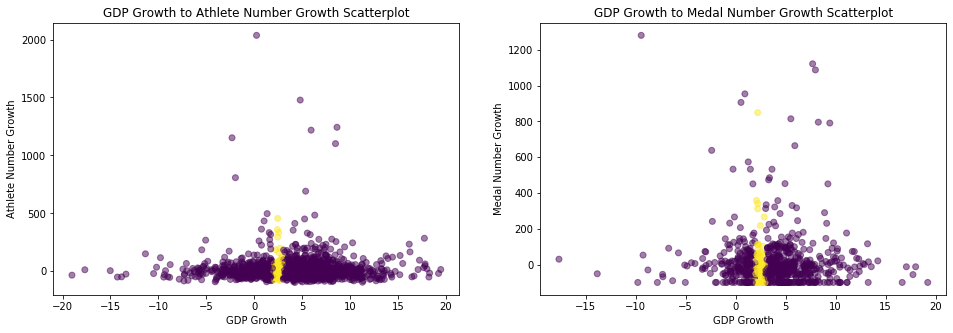

In [33]:
plt.rcParams['figure.figsize'] = [16, 5]
fig, axs = plt.subplots(1, 2)

axs[0].scatter(normal_growth['gdp_growth'], normal_growth['athlete_growth'], alpha=0.5, c=normal_growth['ideal_growth'])
axs[0].set_xlabel('GDP Growth')
axs[0].set_ylabel('Athlete Number Growth')
axs[0].set_title('GDP Growth to Athlete Number Growth Scatterplot')

axs[1].scatter(normal_growth['gdp_growth'], normal_growth['medal_growth'], alpha=0.5, c=normal_growth['ideal_growth'])
axs[1].set_xlabel('GDP Growth')
axs[1].set_ylabel('Medal Number Growth')
axs[1].set_title('GDP Growth to Medal Number Growth Scatterplot')

However, points colored yellow does not show athlete or medal growth that are obviously higher than the rest of the purple points. It seems that being in the ideal range of economic growth or development does not have significant impact on olympics performances. 
___

## Evaluation of Significance

In [34]:
from scipy.stats import ttest_ind

### Question I

#### Differeces of Athelate Number within Income Groups

To check whether there is significant differences between the performances of wealthier and less wealthy countries within each income group, hypothethesis tests are performed to check whether the mean of athelate fraction are significantly different between the two subgroups.

In [35]:
low1_athlete = olympics[(olympics['income_group'] == 1) & (olympics['income_subgroup'] == 0)]['athlete_fraction'].dropna()
low2_athlete = olympics[(olympics['income_group'] == 1) & (olympics['income_subgroup'] == 1)]['athlete_fraction'].dropna()

middle1_athlete = olympics[(olympics['income_group'] == 2) & (olympics['income_subgroup'] == 0)]['athlete_fraction'].dropna()
middle2_athlete = olympics[(olympics['income_group'] == 2) & (olympics['income_subgroup'] == 1)]['athlete_fraction'].dropna()

high1_athlete = olympics[(olympics['income_group'] == 3) & (olympics['income_subgroup'] == 0)]['athlete_fraction'].dropna()
high2_athlete = olympics[(olympics['income_group'] == 3) & (olympics['income_subgroup'] == 1)]['athlete_fraction'].dropna()

The function `bootstrap` is created to plot the histogram of bootstrap resampling the mean of the data:

In [36]:
def bootstrap(data1, data2):
    df1 = pd.DataFrame({"data": data1})
    df2 = pd.DataFrame({"data": data2})

    n_bootstrap = 10000
    mean1 = np.zeros(n_bootstrap)
    mean2 = np.zeros(n_bootstrap)

    for i in range(n_bootstrap):
        resampled_data1 = df1.sample(n=len(df1), replace=True)
        resampled_data2 = df2.sample(n=len(df2), replace=True)
        mean1[i] = resampled_data1['data'].mean()
        mean2[i] = resampled_data2['data'].mean()

    plt.rcParams['figure.figsize'] = [8, 5]
    binsizes, _, _ = plt.hist(mean1, bins=40, alpha=0.7)
    plt.vlines(df1['data'].mean(), ymin=0, ymax=np.max(binsizes), color='red')
    plt.vlines(np.quantile(mean1, q=[0.005])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.vlines(np.quantile(mean1, q=[0.995])[0], ymin=0, ymax=np.max(binsizes), color='green')

    binsizes, _, _ = plt.hist(mean2, bins=40, alpha=0.7)
    plt.vlines(df2['data'].mean(), ymin=0, ymax=np.max(binsizes), color='red')
    plt.vlines(np.quantile(mean2, q=[0.005])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.vlines(np.quantile(mean2, q=[0.995])[0], ymin=0, ymax=np.max(binsizes), color='green')

    plt.show()

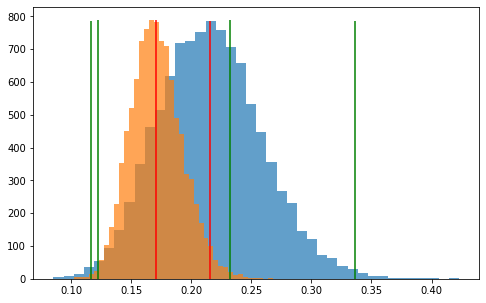

In [38]:
bootstrap(low1_athlete, low2_athlete)

As shown above, the histograms largely overlap with each other and the mean of one of the data is within the confidence interval of the other. This indicates that there isn't a significant difference between the means of athlete fraction of wealthier and less wealthy countries in the Low income group.

In [39]:
stat, p = ttest_ind(low1_athlete, low2_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=0.932, p=0.352


A p-value of 0.352 indicates that we fail to reject the null hypothesis and there isn't a significant difference between the means of athlete fraction of wealthier and less wealthy countries in the Low income group.

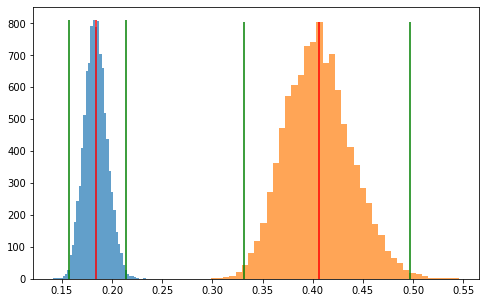

In [41]:
bootstrap(middle1_athlete, middle2_athlete)

As shown above, the histograms are far apart and the means are very different. This indicates that there is a significant difference between the means of athlete fraction of wealthier and less wealthy countries in the Middle income group.

In [42]:
stat, p = ttest_ind(middle1_athlete, middle2_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-6.375, p=0.000


A p-value of 0.000 indicates that we successfully reject the null hypothesis and there is a significant difference between the means of athlete fraction of wealthier and less wealthy countries in the Middle income group.

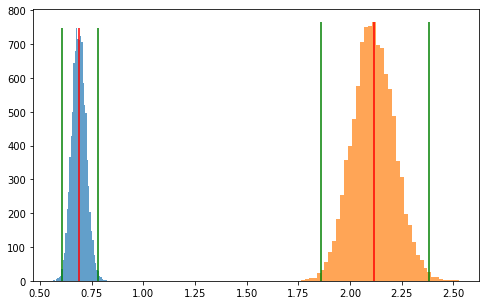

In [43]:
bootstrap(high1_athlete, high2_athlete)

As shown above, the histograms are far apart and the means are very different. This indicates that there is a significant difference between the means of athlete fraction of wealthier and less wealthy countries in the High income group.

In [44]:
stat, p = ttest_ind(high1_athlete, high2_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-13.289, p=0.000


A p-value of 0.000 indicates that we successfully reject the null hypothesis and there is a significant difference between the means of athlete fraction of wealthier and less wealthy countries in the High income group.

#### Differeces of Medal Number within Income Groups

In [45]:
low1_medal = olympics[(olympics['income_group'] == 1) & (olympics['income_subgroup'] == 0)]['medal_fraction'].dropna()
low2_medal = olympics[(olympics['income_group'] == 1) & (olympics['income_subgroup'] == 1)]['medal_fraction'].dropna()

middle1_medal = olympics[(olympics['income_group'] == 2) & (olympics['income_subgroup'] == 0)]['medal_fraction'].dropna()
middle2_medal = olympics[(olympics['income_group'] == 2) & (olympics['income_subgroup'] == 1)]['medal_fraction'].dropna()

high1_medal = olympics[(olympics['income_group'] == 3) & (olympics['income_subgroup'] == 0)]['medal_fraction'].dropna()
high2_medal = olympics[(olympics['income_group'] == 3) & (olympics['income_subgroup'] == 1)]['medal_fraction'].dropna()

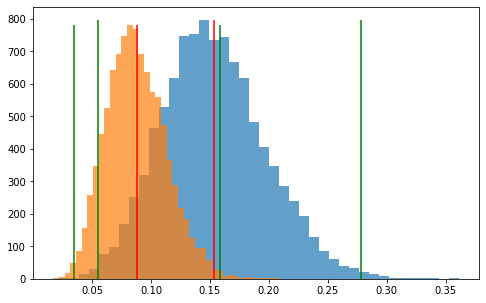

In [46]:
bootstrap(low1_medal, low2_medal)

As shown above, the histograms largely overlap with each other and the mean of one of the data is within the confidence interval of the other. This indicates that there isn't a significant difference between the means of medal fraction of wealthier and less wealthy countries in the Low income group.

In [47]:
stat, p = ttest_ind(low1_medal, low2_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=1.295, p=0.196


A p-value of 0.196 indicates that we fail to reject the null hypothesis and there isn't a significant difference between the means of medal fraction of wealthier and less wealthy countries in the Low income group.

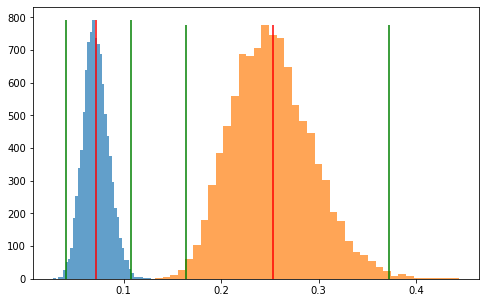

In [48]:
bootstrap(middle1_medal, middle2_medal)

As shown above, the histograms are far apart and the means are very different. This indicates that there is a significant difference between the means of medal fraction of wealthier and less wealthy countries in the Middle income group.

In [49]:
stat, p = ttest_ind(middle1_medal, middle2_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-4.201, p=0.000


A p-value of 0.000 indicates that we successfully reject the null hypothesis and there is a significant difference between the means of medal fraction of wealthier and less wealthy countries in the Middle income group.

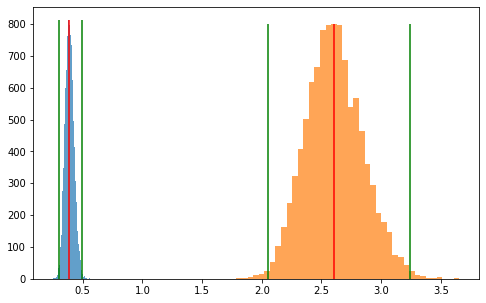

In [50]:
bootstrap(high1_medal, high2_medal)

As shown above, the histograms are far apart and the means are very different. This indicates that there is a significant difference between the means of medal fraction of wealthier and less wealthy countries in the High income group.

In [51]:
stat, p = ttest_ind(high1_medal, high2_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-9.061, p=0.000


A p-value of 0.000 indicates that we successfully reject the null hypothesis and there is a significant difference between the means of medal fraction of wealthier and less wealthy countries in the High income group.

<br>

#### Differeces of Athelate Number between Income Groups

I am also intersted in testing the significance of differences between the groups. The function `bootstrap3` is created to plot three histograms of bootstrap resampling the mean of the data for each income group together:

In [52]:
low_athlete = olympics[(olympics['income_group'] == 1)]['athlete_fraction'].dropna()
middle_athlete = olympics[(olympics['income_group'] == 2)]['athlete_fraction'].dropna()
high_athlete = olympics[(olympics['income_group'] == 3)]['athlete_fraction'].dropna()

In [53]:
def bootstrap3(data1, data2, data3):
    df1 = pd.DataFrame({"data": data1})
    df2 = pd.DataFrame({"data": data2})
    df3 = pd.DataFrame({"data": data3})

    n_bootstrap = 10000
    mean1 = np.zeros(n_bootstrap)
    mean2 = np.zeros(n_bootstrap)
    mean3 = np.zeros(n_bootstrap)

    for i in range(n_bootstrap):
        resampled_data1 = df1.sample(n=len(df1), replace=True)
        resampled_data2 = df2.sample(n=len(df2), replace=True)
        resampled_data3 = df3.sample(n=len(df3), replace=True)
        mean1[i] = resampled_data1['data'].mean()
        mean2[i] = resampled_data2['data'].mean()
        mean3[i] = resampled_data3['data'].mean()

    plt.rcParams['figure.figsize'] = [8, 5]
    binsizes, _, _ = plt.hist(mean1, bins=40, alpha=0.7)
    plt.vlines(df1['data'].mean(), ymin=0, ymax=np.max(binsizes), color='red')
    plt.vlines(np.quantile(mean1, q=[0.005])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.vlines(np.quantile(mean1, q=[0.995])[0], ymin=0, ymax=np.max(binsizes), color='green')

    binsizes, _, _ = plt.hist(mean2, bins=40, alpha=0.7)
    plt.vlines(df2['data'].mean(), ymin=0, ymax=np.max(binsizes), color='red')
    plt.vlines(np.quantile(mean2, q=[0.005])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.vlines(np.quantile(mean2, q=[0.995])[0], ymin=0, ymax=np.max(binsizes), color='green')
    
    binsizes, _, _ = plt.hist(mean3, bins=40, alpha=0.7)
    plt.vlines(df3['data'].mean(), ymin=0, ymax=np.max(binsizes), color='red')
    plt.vlines(np.quantile(mean3, q=[0.005])[0], ymin=0, ymax=np.max(binsizes), color='green')
    plt.vlines(np.quantile(mean3, q=[0.995])[0], ymin=0, ymax=np.max(binsizes), color='green')

    plt.show()

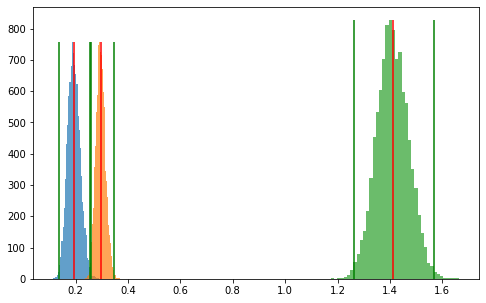

In [54]:
bootstrap3(low_athlete, middle_athlete, high_athlete)

As shown above, the histograms of the Low and Middle income groups are close together while that of the High income group is far apart. While countries from the Middle income group has slightly more athletes in the olympics games than the Low income group, countries from the High income group largely outnumber the rest of the countries.

In [55]:
stat, p = ttest_ind(low_athlete, middle_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat, p = ttest_ind(middle_athlete, high_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat, p = ttest_ind(low_athlete, high_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-3.400, p=0.001
stat=-17.666, p=0.000
stat=-18.734, p=0.000


The p-values of 0.001, 0.000 and 0.000 indicate that we successfully reject the null hypothesis for all three tests and there are significant differences between the means of athlete fraction between all three income groups.

<br>

#### Differeces of Medal Number between Income Groups

In [56]:
low_medal = olympics[(olympics['income_group'] == 1)]['medal_fraction'].dropna()
middle_medal = olympics[(olympics['income_group'] == 2)]['medal_fraction'].dropna()
high_medal = olympics[(olympics['income_group'] == 3)]['medal_fraction'].dropna()

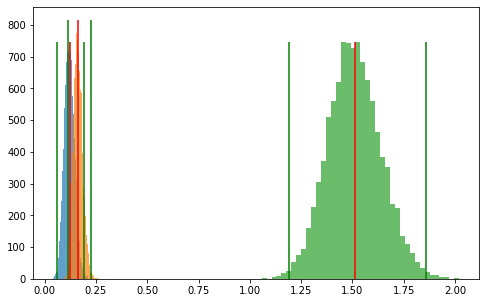

In [57]:
bootstrap3(low_medal, middle_medal, high_medal)

As shown above, the histograms of the Low and Middle income groups largely overlaps while that of the High income group is far apart. Countries from the Middle and Low income groups has about the same average medal fraction, which are much less than that of the High income group.

In [58]:
stat, p = ttest_ind(low_medal, middle_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat, p = ttest_ind(middle_medal, high_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat, p = ttest_ind(low_medal, high_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-1.256, p=0.209
stat=-10.218, p=0.000
stat=-10.517, p=0.000


The p-value of 0.209 indicate that we fail to reject the null hypothesis between the Middle and Low income groups and there isn't a significant difference between the means of medal fraction between the two income groups. Meanwhile, the p-values of 0.000 and 0.000 indicate that we successfully reject the null hypothesis between the High and Low income groups and between the High and Middle income groups, and there is significant differences between the means of medal fraction between each of the the two income groups. Overall, in terms of winning medals, the performances of the Middle and Low income groups are about the same and countries from the High income group largely outperform them.

<br>

#### Differeces of Gold Medal Number between Income Groups

In [59]:
low_gold = olympics[(olympics['income_group'] == 1)]['gold_fraction'].dropna()
middle_gold = olympics[(olympics['income_group'] == 2)]['gold_fraction'].dropna()
high_gold = olympics[(olympics['income_group'] == 3)]['gold_fraction'].dropna()

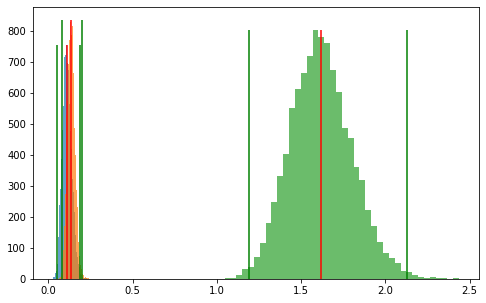

In [60]:
bootstrap3(low_gold, middle_gold, high_gold)

As shown above, the histograms of the Low and Middle income groups largely overlaps while that of the High income group is far apart. Countries from the Middle and Low income groups has about the same average gold medal fraction, which are much less than that of the High income group.

In [61]:
stat, p = ttest_ind(low_gold, middle_gold)
print('stat=%.3f, p=%.3f' % (stat,p))

stat, p = ttest_ind(middle_gold, high_gold)
print('stat=%.3f, p=%.3f' % (stat,p))

stat, p = ttest_ind(low_gold, high_gold)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-0.686, p=0.493
stat=-7.991, p=0.000
stat=-8.118, p=0.000


The p-value of 0.493 indicate that we fail to reject the null hypothesis between the Middle and Low income groups and there isn't a significant difference between the means of gold medal fraction between the two income groups. Meanwhile, the p-values of 0.000 and 0.000 indicate that we successfully reject the null hypothesis between the High and Low income groups and between the High and Middle income groups, and there is significant differences between the means of gold medal fraction between each of the the two income groups. Overall, in terms of winning gold medals, the performances of the Middle and Low income groups are about the same and countries from the High income group largely outperform them.

<br>

### Question II

#### Difference of Athlete Fraction Changes between Countries of Positive and Negative Growths
For question II, I want to check whether there is a significant differeces of changes in olympics performances between countries with positive and negative GDP growth:

In [62]:
positive_growth_athlete = olympics[olympics['gdp_growth'] >= 0]['athlete_growth'].dropna()
negative_growth_athlete = olympics[olympics['gdp_growth'] < 0]['athlete_growth'].dropna()

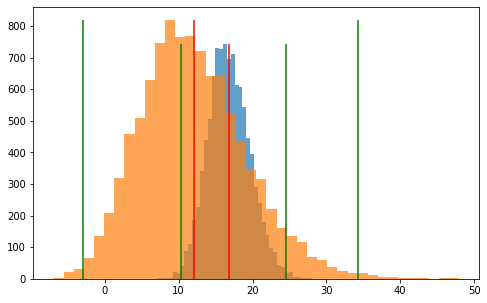

In [63]:
bootstrap(positive_growth_athlete, negative_growth_athlete)

As shown above, the histograms largely overlap with each other and the mean of one of the data is within the confidence interval of the other. This indicates that there isn't a significant difference between the means of athlete fraction growth of countries with positive and negative growth.

In [64]:
stat, p = ttest_ind(positive_growth_athlete, negative_growth_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=0.617, p=0.538


A p-value of 0.538 indicates that we fail to reject the null hypothesis and there isn't a significant difference between the means of athlete fraction growth of countries with positive and negative growth.

In [65]:
positive_growth_medal = olympics[olympics['gdp_growth'] >= 0]['medal_growth'].dropna()
negative_growth_medal = olympics[olympics['gdp_growth'] < 0]['medal_growth'].dropna()

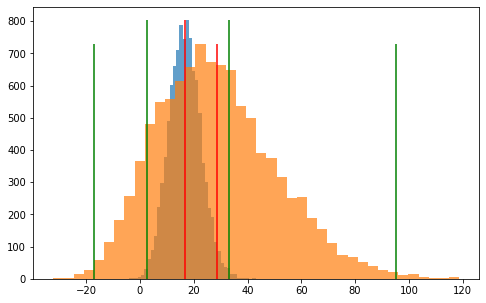

In [66]:
bootstrap(positive_growth_medal, negative_growth_medal)

As shown above, the histograms largely overlap with each other and the mean of one of the data is within the confidence interval of the other. This indicates that there isn't a significant difference between the means of medal fraction growth of countries with positive and negative growth.

In [67]:
stat, p = ttest_ind(positive_growth_medal, negative_growth_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-0.635, p=0.525


A p-value of 0.525 indicates that we fail to reject the null hypothesis and there isn't a significant difference between the means of medal fraction growth of countries with positive and negative growth.

<br>

#### Difference of Athlete Fraction Changes between Countries in Ideal GDP Growth Ranges and the Others

In [68]:
ideal_growth_athlete = olympics[olympics['ideal_growth'] == 1]['athlete_growth'].dropna()
unideal_growth_athlete = olympics[olympics['ideal_growth'] == 0]['athlete_growth'].dropna()

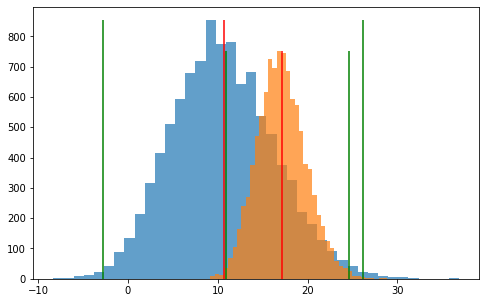

In [69]:
bootstrap(ideal_growth_athlete, unideal_growth_athlete)

As shown above, the histograms largely overlap with each other and the mean of one of the data is within the confidence interval of the other. This indicates that there isn't a significant difference between the means of athlete fraction growth of countries inside ideal range of GDP growth and countries outside.

In [70]:
stat, p = ttest_ind(ideal_growth_athlete, unideal_growth_athlete)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-0.726, p=0.468


A p-value of 0.468 indicates that we fail to reject the null hypothesis and there isn't a significant difference between the means of athlete fraction growth of countries inside ideal range of GDP growth and countries outside.

In [71]:
ideal_growth_medal = olympics[olympics['ideal_growth'] == 1]['medal_growth'].dropna()
unideal_growth_medal = olympics[olympics['ideal_growth'] == 0]['medal_growth'].dropna()

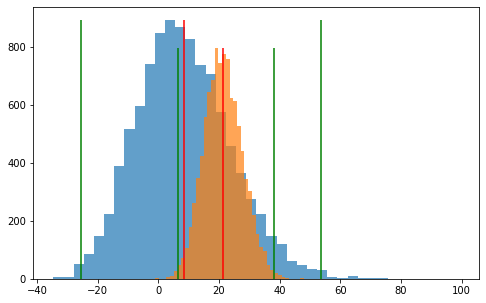

In [72]:
bootstrap(ideal_growth_medal, unideal_growth_medal)

As shown above, the histograms largely overlap with each other and the mean of one of the data is within the confidence interval of the other. This indicates that there isn't a significant difference between the means of medal fraction growth of countries inside ideal range of GDP growth and countries outside.

In [73]:
stat, p = ttest_ind(ideal_growth_medal, unideal_growth_medal)
print('stat=%.3f, p=%.3f' % (stat,p))

stat=-0.675, p=0.500


A p-value of 0.500 indicates that we fail to reject the null hypothesis and there isn't a significant difference between the means of athlete fraction growth of countries inside ideal range of GDP growth and countries outside.

## Interpretation and Conclusions

Among all indicators, we found that each nation's GDP has the highest correlation to the Olympics performance, interms of the number of atheletes and the medal they gain. 

Less wealthier countries tend to have fewer atheletes participating in the Olympics game, and they win fewer medals. Within this group, higher  GDP or GDP growth has nearly no effect on their Olympics performance. We infer that less wealthier countries struggle more on fulfilling the life expenses of their citizens and seldom have spare efforts to raise a budget for training top-performing atheletes. 

More wealthier countries (grouped as "middle" or "high" in our analysis) tend to have more atheletes win more medals. Within this group, higher GDP or GDP growth often translates to higher Olympics performance. 

We also evaluate the countries' performance in Olympics games in terms of different metrics in increasing difficulties: getting more participating atheletes, winning more medals, and winning more gold medals. We discovered that the discrepancy between the countries' performance in these tasks widens as the task becomes more difficult. For example, the three gorups of country behaves moderately differently in terms of athelete participation; from winning medal to winning goal medals, the gap between high-income countries and the other group widens even more. Wealthier countries have drastic advantage on winning more medals, especially gold medals. 

We summarize that the best performances in Olympics game cluster around only a few of the wealthiest countries in the world. We prospect that wealthier countries have more resources and investments allocated for training their atheletes. However, this does not take into account the fact that top athletes from less wealthy countries may immigrate to wealthy countries for better training resources, career development, and welfare.
___

## Limitations (from previous Data Limitation, should add more)

* The earlist record from World Bank dataset start at 1960. Therefore olympic game results before 1960 cannot be included in the analysis.

* The dataset contains only the summer olympics results. This does not fully reflect that some countries might perform better in Winter olympics.
* The Olympic game is quadrennial, so that the data reflecting a country's sport performance is limited. The four year gap also fail to reflect a country's well-being in the middle of the 4-year period.
* The individual athletes and the refugee groups are not included because they do not officially affiliate to any countries. But this overlook the training and other domestic resources they get from their countries and tend to undermeasure the performance of the countries.
* Some countries in the olympics game do not have indicator records in the World Bank database.
* Some countries might be divided and is different from what it is today (ex. Germany used to be East Germany and West Germay). The final dataset merges these data during processing but the data from the World Bank does not reflect the discrepency between different parts of the country.
* Some entries in the indicator datasets are missing from the World Bank database.
* Although there are more than 200 countries in the dataset, only half of them or less actually win a medal. So the  data that actually give insights into the relationship between olympics performance and a country's well being is very limited.
* Only the top three athlete or so wins a medal and this does not sufficiently reflects how well a country is performing in the athlete events. For example, the 4th place and the 10th place differ a lot in the performance, but only counting the medal number fails to differentiate such differences.
* Economic indicators such as the GDP does not precisely reflect a country's economic well-being because the cost of living differs a lot between countries.
___

## Source Code

Link to Github Repository: https://github.coecis.cornell.edu/yk499/info2950-project.git
____

## Acknowledgments

The athlete event dataset is obtained from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results.

The raw indicators dataset can be found at the World Bank database at https://data.worldbank.org/indicator?tab=all.

The quote of the Olympics charter is found at: https://www.un.org/en/chronicle/article/olympic-movement-united-nations-and-pursuit-common-ideals